# THE SPARKS FOUNDATION

## NAME:RITIK BANERJEE

### Predict the percentage of an student based on the no. of study hours.

In [1]:
#importing required libraries
library(ggplot2)
library(caTools)
library(Metrics)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'caTools' was built under R version 3.6.3"Warning message:
"package 'Metrics' was built under R version 3.6.3"

In [2]:
data<-read.csv("http://bit.ly/w-data")

In [3]:
data

Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20
9.2,88
5.5,60
8.3,81
2.7,25


In [11]:
str(data)

'data.frame':	25 obs. of  2 variables:
 $ Hours : num  2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 ...
 $ Scores: int  21 47 27 75 30 20 88 60 81 25 ...


In [12]:
summary(data)

     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

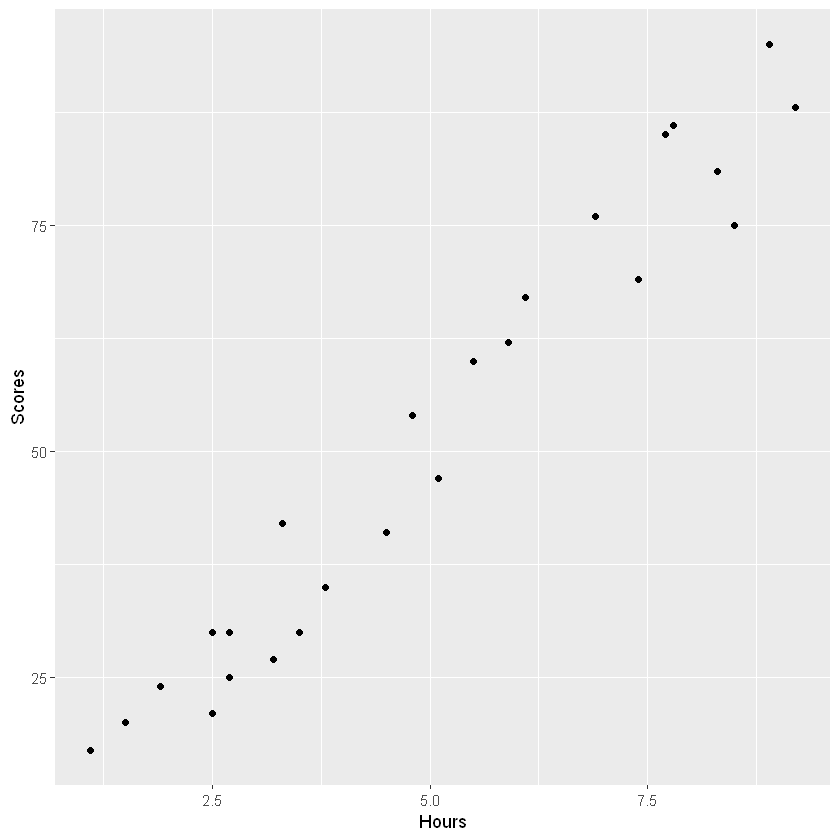

In [6]:
ggplot(data,aes(x=Hours,y=Scores))+
geom_point()

## Preparing the Training and Test data set

In [16]:
#splitting the data set in the ratio of 0.8
split<-sample.split(data,SplitRatio=0.8)
train<-subset(data,split=="TRUE")
test<-subset(data,split=="FALSE")

## Training The Model

In [18]:
model<-lm(Scores~.,train)

In [19]:
model


Call:
lm(formula = Scores ~ ., data = train)

Coefficients:
(Intercept)        Hours  
    -0.3332      10.2119  


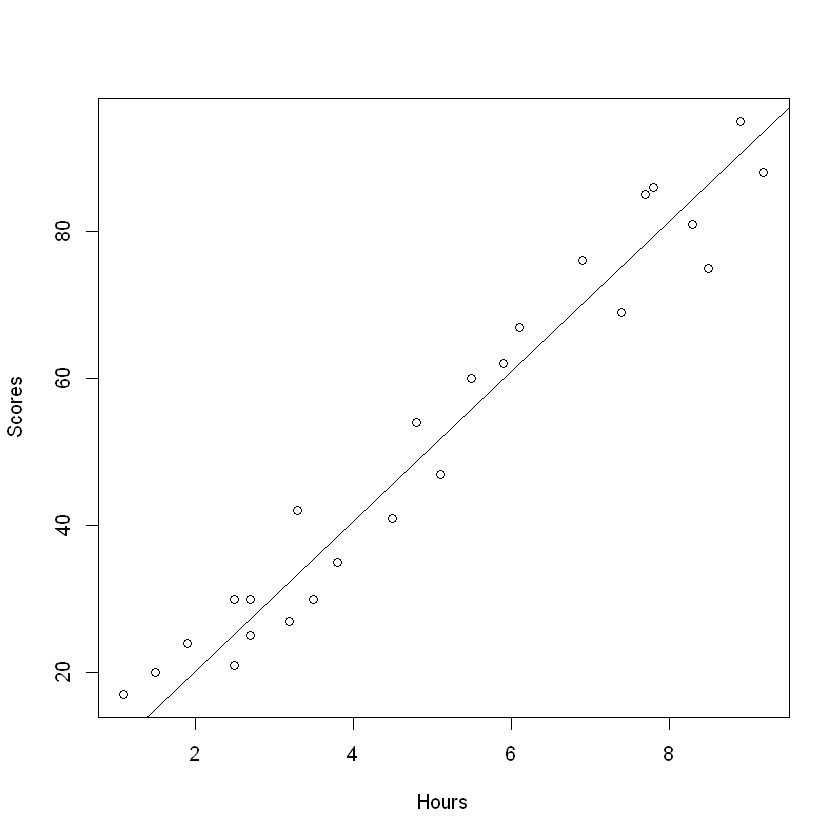

In [29]:
plot(data)
abline(model)

## Predicting the Data

In [30]:
pred<-predict(model,test)

In [31]:
pred

2        4        6        8       10       12       14       16 
51.74774 86.46834 14.98474 55.83252 27.23908 59.91729 33.36624 90.55312 
      18       20       22       24 
19.06952 75.23521 48.68416 70.12924

In [32]:
#Now we should check the predicted data against the original data
p<-data.frame(Actual=test$Scores,Prediction=pred)

In [33]:
p

,Actual,Prediction
2,47,51.74774
4,75,86.46834
6,20,14.98474
8,60,55.83252
10,25,27.23908
12,62,59.91729
14,42,33.36624
16,95,90.55312
18,24,19.06952
20,69,75.23521


In [38]:
#Now lets predict the score against the given input(hours)
k<-data.frame(Hours=9.25,Scores=0)

In [39]:
s<-predict(model,k)

In [41]:
k$Scores<-s

In [42]:
k

Hours,Scores
9.25,94.1273


## As we can see the predicted Score for 9.25 Hour is 94.1273

## Evaluating the model

In [43]:
#to evaluate the model we use the Mean Absolute Error Method
x<-mae(test$Scores,pred)
cat("Mean Absolute Error :",x)

Mean Absolute Error : 5.429461